<a href="https://colab.research.google.com/github/Sairam-04/Crop-Recommendation-System-Using-Deep-Learning/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1><b><center>Crop Recommendation</b></h1>



<h2>Abstract</h2><br>
<p>
Agriculture is one of the most important sectors in India and the farmers are one of the most essential members of society.
In India Agriculture plays a predominant role in the economy and employment. One of the major problems among Indian farmers is that they don't choose the right crop based on their soil requirements. Due to this farmers face many problems in the productivity of crops. This problem has been addressed through precision agriculture. </p>
<p>
Precision agriculture is a trend now-a-days. It helps the farmers to take the decision about the farming strategy. 
Precision Agriculture is a strategy that uses data such as soil characteristics and climate data to suggest the crop to be grown. Emerging technologies like Artificial Intelligence and IoT can help in this task. IoT sensors captures the soil characteristics and weather data, this data can be used to build a Deep Learning model which can recommend the most suitable crops to grow on a particular farm. This can help farmers to make decisions on which crops to grow on their farm. 
</p>

<h3><b>About the Project:</b></h3>
<p>
The Project is about building an Artificial Neural Network model that predicts which crop to be grown based on 
these features.<br>
1.   N - ratio of Nitrogen content in soil<br>
2.   P - ratio of Phosphorous content in soil<br>
3.   K - ratio of Potassium content in soil<br>
4.   temperature - temperature in degree Celsius<br>
5.   humidity - relative humidity in %<br>
6.   ph - ph value of the soil<br>
7.   rainfall - rainfall in mm<br>

<h3><b>Dataset:</b></h3>

[<button>dataset</button>](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset)




Importing the Packages




In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras


Reding the Crop_recommendation.csv file using pandas read_csv() method.

In [5]:
df = pd.read_csv('Crop_recommendation.csv')

Printing the summary of the data using info() method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Printing the first ten rows from the dataset using head() method.

In [7]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


Finding whether there are any null values in the dataset

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

##Exploratory Data Analysis

In [9]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


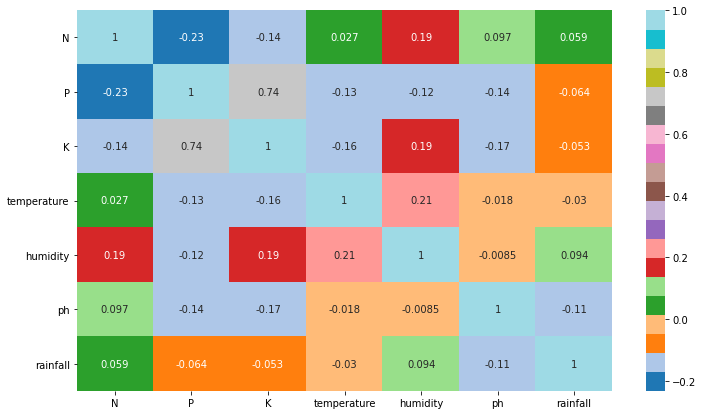

In [10]:
fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot=True, cmap='tab20',ax=ax )

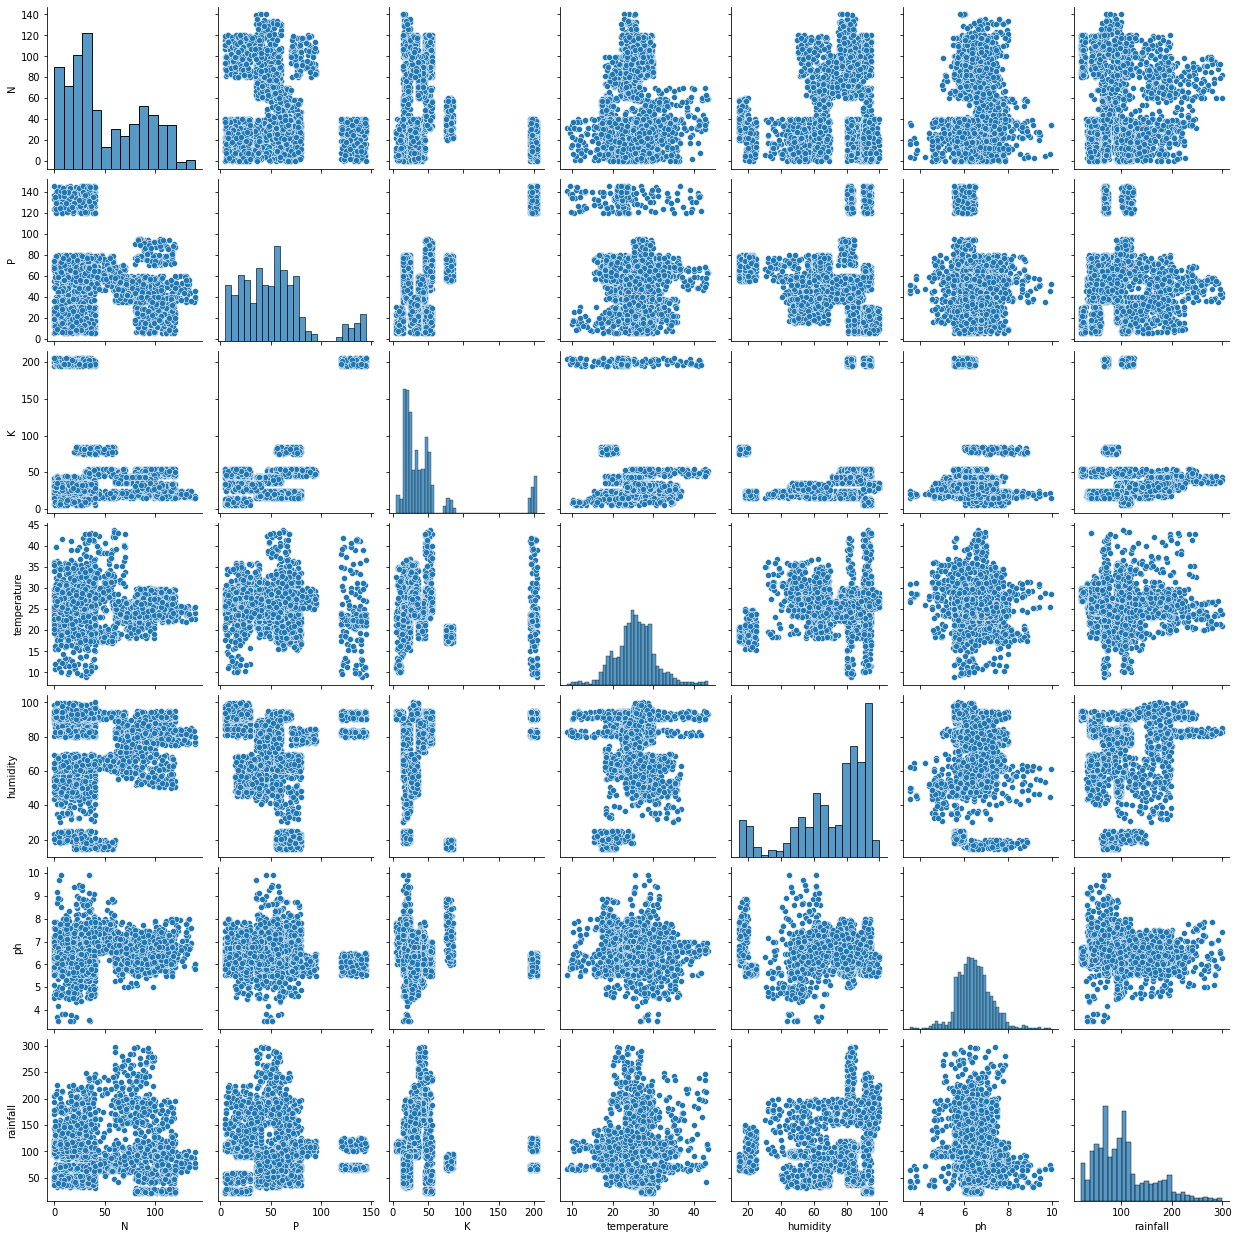

In [11]:
sns.pairplot(df)

In [12]:
x = df['label'].value_counts().to_dict()

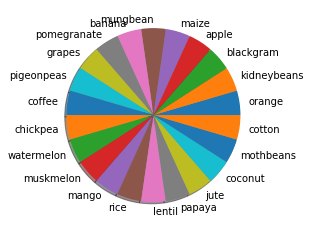

In [13]:
x_v = list(x.values())
x_k = list(x.keys())
plt.pie(x_v, labels=x_k, shadow=True)
plt.show()

Handling Categorical Data

Creating the list of output labels

In [14]:
labels = df['label'].unique()

Creating the dictionary of categorical values and their labels

In [15]:
labeled_data = {}
j=0
for i in labels:
  labeled_data[i] = j
  j+=1

In [16]:
print(labeled_data)

{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [17]:
label_values = list(labeled_data.values())

In [18]:
print(labels)
print("\n\n")
print(label_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [19]:
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Label encoding the categorical values and adding the label_encoded column in the dataframe with encoded values

In [20]:
df['label_encoded'] = df.label.map(labeled_data)

In [21]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [22]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


Separting the Input and output features in the dataset

In [23]:
X = df.drop(['label','label_encoded'],axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [24]:
y = df['label_encoded']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_encoded, dtype: int64

Splitting the data into train set and test set

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

Feature Scaling: Scaling the numerical data

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
sc.mean_

array([ 50.39261364,  52.88238636,  47.23579545,  25.58610532,
        71.20236431,   6.46069391, 104.99553826])

In [34]:
np.sqrt(sc.var_)

array([36.6511325 , 32.50093228, 49.19601994,  5.08611542, 22.50626072,
        0.78173883, 55.66283749])

In [ ]:
X_train.shape

(1760, 7)

# ANN Model

Building the architecture of the ANN Model

In [35]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(28,input_shape=(7,),activation='relu'))
model.add(keras.layers.Dense(64,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(28,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(22,input_shape=(7,), activation='softmax'))

In [36]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Architecture of the Neural Network

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_2 (Dense)              (None, 28)                1820      
_________________________________________________________________
dense_3 (Dense)              (None, 22)                638       
Total params: 4,538
Trainable params: 4,538
Non-trainable params: 0
_________________________________________________________________


Fitting the training data to the neural network model

In [38]:
history = model.fit(x=X_train, y = y_train,epochs=500)

Epoch 1/500
55/55 [==============================] - 1s 2ms/step - loss: 2.9150 - accuracy: 0.2301
Epoch 2/500
55/55 [==============================] - 0s 2ms/step - loss: 2.1720 - accuracy: 0.4812
Epoch 3/500
55/55 [==============================] - 0s 2ms/step - loss: 1.2899 - accuracy: 0.7136
Epoch 4/500
55/55 [==============================] - 0s 1ms/step - loss: 0.7578 - accuracy: 0.8244
Epoch 5/500
55/55 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.8790
Epoch 6/500
55/55 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.9080
Epoch 7/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9301
Epoch 8/500
55/55 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9426
Epoch 9/500
55/55 [==============================] - 0s 1ms/step - loss: 0.1743 - accuracy: 0.9585
Epoch 10/500
55/55 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9580
Epoch 11/

Plotting the Loss and accuracy of the training data

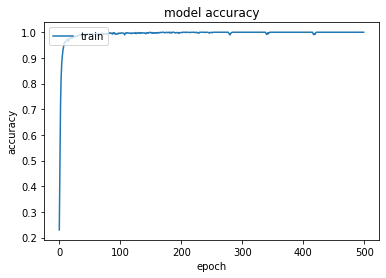

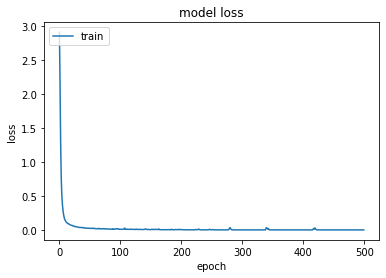

In [39]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluating the model on test data

In [40]:
eval = model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9841


Testing the model 

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
file_path = '/content/drive/MyDrive/Crop Recommendation Project/Crop_Recomendation/Crop_Images/'

mango


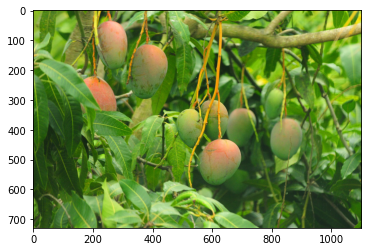

In [52]:
test1 = sc.transform(np.array([[30,28,30,32,52,5,98]]))
pre1 = np.argmax(model.predict(test1))
print(labels[pre1])
img_path = str(labels[pre1])+'.jpg'
x = plt.imread(file_path+img_path)
plt.imshow(x)
plt.show()

coffee


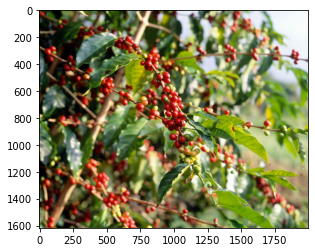

In [56]:
test2 = sc.transform(np.array([[104, 18, 30, 24, 60, 7, 141]]))
pre2 = np.argmax(model.predict(test2))
print(labels[pre2])
img_path = str(labels[pre2])+'.jpg'
x = plt.imread(file_path+img_path)
plt.imshow(x)
plt.show()

In [ ]:
model.save("Crop_Recommendation.h5")